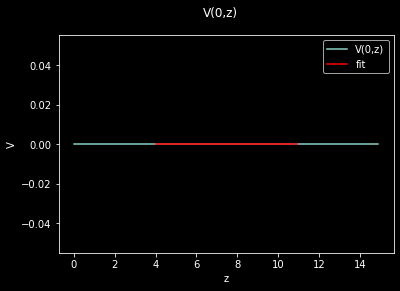

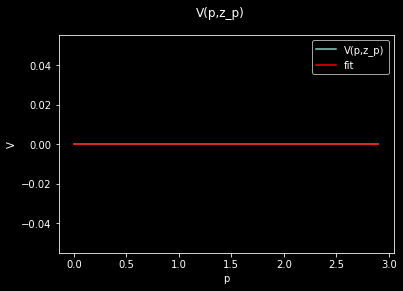

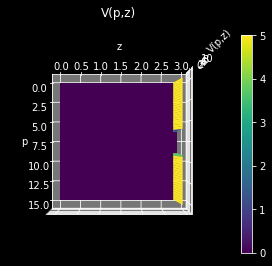

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import numba as nb

# Define constants
dp = 0.1
dz = 0.1
j1 = 60
j2 = 90
m = 150
n = 30
ITMAX = 5000
V0 = 10
z_p = int((j1 + j2) / 2)

V = np.zeros((n, m))


@nb.njit
def Potencial(i, j):
    if i == n - 1 and j <= j1:
        return V0
    if i == n - 1 and j > j1 and j <= j2:
        return 0

    if i == n - 1 and j > j2:
        return V0

    if j == m - 1 and i > 0:
        return V[i, m - 2]

    if j == 0 and i > 0:
        return V[i, 1]

    if i == 0 and j > 0:
        return V[1, j]

    if i == 0 and j == 0:
        return (V[0, 1] + V[1, 0]) / 2

    Potencial = 0
    Potencial += (V[i + 1, j] + V[i - 1, j]) / (dp**2)
    Potencial += (V[i + 1, j] - V[i - 1, j]) / (2 * i * dp**2)
    Potencial += (V[i, j + 1] + V[i, j - 1]) / (dz**2)
    Potencial *= 1 / (2 / (dp**2) + 2 / (dz**2))
    return Potencial


# Main simulation function
def exc1():
    """
    Main simulation function.
    """
    for _ in range(ITMAX):
        for j in range(m):
            for i in range(n):
                V[i, j] = Potencial(i, j)


# Call the main simulation function
exc1()
Vz = V[0, :]
Vp = V[:, z_p]

p = np.arange(n) * dp
z = np.arange(m) * dz

poly_p = np.poly1d(np.polyfit(p, Vp, 2))
poly_z = np.poly1d(np.polyfit(z[50:100], Vz[50:100], 2))
# Plotting
plt.style.use("dark_background")
fig1, ax1 = plt.subplots()
ax1.plot(z, Vz, label=f"V(0,z)")
ax1.plot(z[40:110], poly_z(z[40:110]), label=f"fit", color="red")
ax1.set_ylabel("V")
ax1.set_xlabel("z")
ax1.legend()

fig2, ax2 = plt.subplots()
ax2.plot(p, Vp, label=f"V(p,z_p)")
ax2.plot(p, poly_p(p), label=f"fit", color="red")
ax2.set_ylabel("V")
ax2.set_xlabel("p")
ax2.legend()


# Plot 3D surface plot
p, z = np.meshgrid(np.arange(m) * dz, np.arange(n) * dp)
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection="3d")
ax3.view_init(40, 60)
surf = ax3.plot_surface(
    p,
    z,
    V,
    label="V(p,z)",
    cmap="viridis",
)
ax3.set_ylabel("z")
ax3.set_xlabel("p")
ax3.set_zlabel("V(p,z)")
fig3.colorbar(surf)

# Save the plot
path = "."
fig1.suptitle(f"V(0,z)")
fig1.savefig(f"{path}/V(0,z).png")
fig2.suptitle(f"V(p,z_p)")
fig2.savefig(f"{path}/V(p,z_p).png")
fig3.suptitle(f"V(p,z)")
fig3.savefig(f"{path}/V(p,z).png")
ax3.view_init(90, 0)
fig3.savefig(f"{path}/V(p,z)-from_top.png")
plt.show()



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import numba as nb
# Define constants
dp = 0.1
dz = 0.1
j1 = 60
j2 = 90
m = 150
n = 30
ITMAX = 5000
V0 = 10
z_p = int((j1 + j2) / 2)

V = np.zeros((n, m))


@nb.njit
def Potencial(i, j):
    if i == n - 1 and j <= j1:
        return V0
    if i == n - 1 and j > j1 and j <= j2:
        return 0

    if i == n - 1 and j > j2:
        return V0

    if j == m - 1 and i > 0:
        return V[i, m - 2]

    if j == 0 and i > 0:
        return V[i, 1]

    if i == 0 and j > 0:
        return V[1, j]

    if i == 0 and j == 0:
        return (V[0, 1] + V[1, 0]) / 2

    Potencial = 0
    Potencial += (V[i + 1, j] + V[i - 1, j]) / (dp**2)
    Potencial += (V[i + 1, j] - V[i - 1, j]) / (2 * i * dp**2)
    Potencial += (V[i, j + 1] + V[i, j - 1]) / (dz**2)
    Potencial *= 1 / (2 / (dp**2) + 2 / (dz**2))
    return Potencial


@nb.njit
def exc1():
    """
    Main simulation function.
    """
    for _ in range(ITMAX):
        for j in range(m):
            for i in range(n):
                V[i, j] = Potencial(i, j)


# Call the main simulation function
exc1()
Vz = V[0, :]
Vp = V[:, z_p]

p = np.arange(n) * dp
z = np.arange(m) * dz

poly_p = np.poly1d(np.polyfit(p, Vp, 2))
poly_z = np.poly1d(np.polyfit(z[50:100], Vz[50:100], 2))
# Plotting
plt.style.use("dark_background")
fig1, ax1 = plt.subplots()
ax1.plot(z, Vz, label=f"V(0,z)")
ax1.plot(z[40:110], poly_z(z[40:110]), label=f"fit", color="red")
ax1.set_ylabel("V")
ax1.set_xlabel("z")
ax1.legend()

fig2, ax2 = plt.subplots()
ax2.plot(p, Vp, label=f"V(p,z_p)")
ax2.plot(p, poly_p(p), label=f"fit", color="red")
ax2.set_ylabel("V")
ax2.set_xlabel("p")
ax2.legend()


# Plot 3D surface plot
p, z = np.meshgrid(np.arange(m) * dz, np.arange(n) * dp)
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection="3d")
ax3.view_init(40, 60)
surf = ax3.plot_surface(
    p,
    z,
    V,
    label="V(p,z)",
    cmap="plasma",
)
ax3.set_ylabel("z")
ax3.set_xlabel("p")
ax3.set_zlabel("V(p,z)")
fig3.colorbar(surf)

# Save the plot
path = "./"
fig1.suptitle(f"V(0,z)")
fig1.savefig(f"{path}/V(0,z).png")
fig2.suptitle(f"V(p,z_p)")
fig2.savefig(f"{path}/V(p,z_p).png")
fig3.suptitle(f"V(p,z)")
fig3.savefig(f"{path}/V(p,z).png")
ax3.view_init(90, 0)
fig3.savefig(f"{path}/V(p,z)-from_top.png")
plt.show()


<Figure size 1080x720 with 0 Axes>

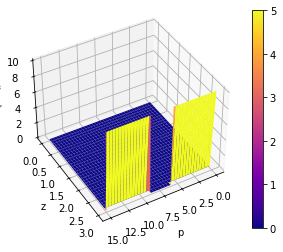

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import numba as nb

# Define constants
drho = 0.1
dz = 0.1
j1 = 60
j2 = 90
m = 150
n = 30
ITMAX = 5000
V0 = 10
z_p = int((j1 + j2) / 2)

def calculate_energy(V):
    
    return E


# Warunki brzegowe 
def boundary_conditions(V):
    V[n,0:j1] = V0      # Obszar 1 
    V[n, j1:j2] = 0     # Obszar 2
    V[n, j2:m] = V0     # Obszar 3
    V[1:n-1, m] = V[1:n-1, m-1]  #Obszar 4
    V[1:n-1, 0] = V[1:n-1, 1] # Obszar 5
    V[0,1:m-1] = V[1, 1:m-1] # Obszar 6
    return V



def run_simulation():
    rho = np.zeros(n)
    z = np.zeros(m)
    for i in range(n):
        rho[i] = drho * i
    for j in range(m):
        z[j] = dz * j

    V = np.zeros((n+1,m+1))
    for j in range(1,m):
        for i in range(1,n):
            V[i,j] = 1/(2/drho**2 + 2/dz**2)*((V[i+1, j] + V[i-1,j])/(drho**2) + 1/rho[i] * (V[i+1, j] + V[i-1,j])/(2*drho) + (V[i, j+1] + V[i,j-1])/(dz**2))
    V = boundary_conditions(V)
    return V

V = run_simulation()
plt.figure(figsize = (15,10))
p, z = np.meshgrid(np.arange(m+1) * dz, np.arange(n+1) * drho)
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection="3d")
ax3.view_init(40, 60)
surf = ax3.plot_surface(
    p,
    z,
    V,
    label="V(p,z)",
    cmap="plasma",
)
ax3.set_ylabel("z")
ax3.set_xlabel("p")
ax3.set_zlabel("V(p,z)")
fig3.colorbar(surf)